In [24]:
!pip install ultralytics
!pip install vietocr
!pip install easyocr


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import easyocr
from PIL import Image

In [26]:
reader = easyocr.Reader(['vi'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [27]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_name('vgg_transformer')
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [28]:
detector = Predictor(config)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was

Model weight C:\Users\PC\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [29]:
from ultralytics import YOLO
import cv2

In [30]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [31]:
model = YOLO('C:\\Users\\PC\\OneDrive\\Tài liệu\\Streamlit\\Weight\\best1.pt')

In [32]:
img1 = cv2.imread('C:\\Users\\PC\\OneDrive\\Tài liệu\\Streamlit\\200.png')
img2 = cv2.imread('C:\\Users\\PC\\OneDrive\\Tài liệu\\Streamlit\\199.png')

In [33]:
results = model([img1])

KeyboardInterrupt: 

In [ ]:
for i in results:
    image = i.orig_img
print(image)

[[[253 253 247]
  [253 255 255]
  [251 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 255 254]
  [245 247 247]
  [250 249 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 246 248]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
def tensor_to_numpy(tensor):
    return tensor.cpu().detach().numpy()

In [ ]:
for bbox in results:
    bbox_info = bbox.boxes.xyxy
    bounding_boxes = tensor_to_numpy(bbox_info)

In [ ]:
cropped_images = []
for bbox in bounding_boxes:
    x1, y1, x2, y2 = bbox
    # Crop the image to the bounding box, note that numpy uses y first
    cropped_img = image[int(y1):int(y2), int(x1):int(x2)]
    cropped_images.append(cropped_img)

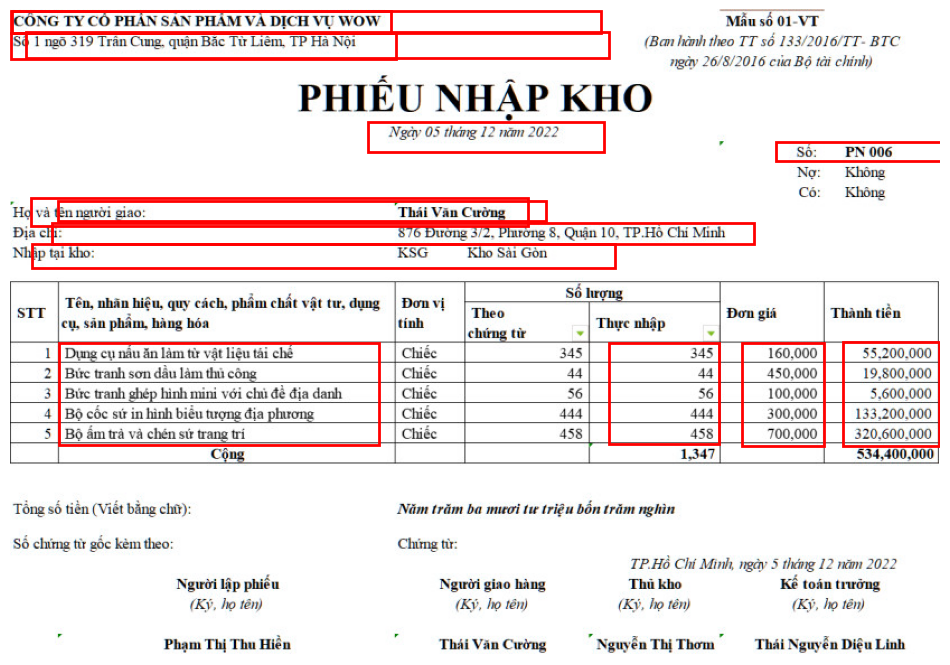

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming `orig_image` is a numpy array representation of your original image
# Assuming `bounding_boxes` is a numpy array containing your bounding boxes coordinates

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(image)

# Now, let's add the bounding boxes with labels
for bbox in bounding_boxes:
    # Create a Rectangle patch
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                             linewidth=2, edgecolor='r', facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rect)

# Remove axis off for a cleaner image
plt.axis('off')

# Finally, show the plot
plt.show()


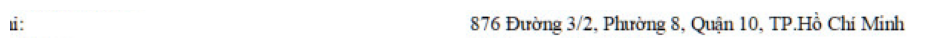

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(cropped_images[3])

# Loop through the results and draw the bounding box and text
for (bbox, text, prob) in result:
    # Draw the bounding box
    top_left = bbox[0]  # Top left corner
    bottom_right = bbox[2]  # Bottom right corner
    # ax.add_patch(plt.Rectangle(top_left, bottom_right[0] - top_left[0], bottom_right[1] - top_left[1], color='red', fill=False, lw=2))


# Hide the axis
ax.axis('off')

# Show the image
plt.show()

In [ ]:
for i in range(len(cropped_images)):
    result = reader.readtext(cropped_images[i], add_margin=0.15)
    for bound in result:
        bbox = bound[0]
        # Crop the image to the bounding box
        x_min, y_min = [int(min(pt[0] for pt in bbox)), int(min(pt[1] for pt in bbox))]# crop the image 
        x_max, y_max = [int(max(pt[0] for pt in bbox)), int(max(pt[1] for pt in bbox))]# crop the bounding boxes and turn them into images
        cropped_image = Image.fromarray(cropped_images[i][y_min:y_max, x_min:x_max])#
        s = detector.predict(cropped_image)
        print(s)


Dụng cụ nấu ăn làm từ vật liệu tái chế
Bức tranh sơn dâu làm thủ công
Bức tranh ghép hình mini với chủ đề địa danh
Bộ cốc sứ in hình biểu tượng địa phương
Bộ ấm trả và chén sứ trang
55,200,000
19,800,000
5,600,000
133,200,000
320,600,000
60,000
450,000
100,000
00,000
00,000
1876 Đường 3/2, Phường 3
Quận 10, TP.Hồ Chí Minh
CÔNG TY CÓ PHẦN SẢN PHÁM VÀ DỊCH VỤ WOW
PN 006
ngõ 319 Trần Cung, quận Bắc Từ Liêm, TP Hà Nội
tập tại kho:
KSG
Kho Sài Gòn
Ngày 05 tháng
năm
2022
tên người 1
Thái Văn Cường
19 ngõ 319 Trần Cung, quận Bắc Tử Liêm, TP Hà Nội
và tên người giao:
Thái Văn Cường
CÔNG TY CÓ PHẦN SẢN PHẨM VÀ DỊCH VỤ WOW
